# Import Stock Trades by Senators Using Senator Stock Watch 

In [2]:
import pandas as pd
#https://docs.google.com/spreadsheets/d/1lH_LpTgRlfzKvpRnWYgoxlkWvJj0v1r3zN3CeWMAgqI/edit?usp=sharing
try:
    sen_df = pd.read_csv("Senator Stock Trades/Senate Stock Watcher 04_16_2020 All Transactions.csv")
except:
    sen_df = pd.read_csv("https://github.com/pkm29/big_data_final_project/raw/master/Senate%20Stock%20Trades/Senate%20Stock%20Watcher%2004_16_2020%20All%20Transactions.csv")
sen_df.head()

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link
0,03/04/2020,Joint,--,INGERSOLL RAND PLC SHARES (Exchanged) <br> TRA...,Stock,Exchange,"$1,001 - $15,000",--,Sheldon Whitehouse,https://efdsearch.senate.gov/search/view/ptr/4...
1,03/04/2020,Self,--,INGERSOLL RAND PLC SHS (Exchanged) <br> TRANE ...,Stock,Exchange,"$1,001 - $15,000",--,Sheldon Whitehouse,https://efdsearch.senate.gov/search/view/ptr/4...
2,03/11/2020,Self,ILMN,"Illumina, Inc.",Stock,Sale (Full),"$1,001 - $15,000",--,Sheldon Whitehouse,https://efdsearch.senate.gov/search/view/ptr/4...
3,03/11/2020,Self,CGNX,Cognex Corporation,Stock,Sale (Full),"$15,001 - $50,000",--,Sheldon Whitehouse,https://efdsearch.senate.gov/search/view/ptr/4...
4,03/11/2020,Self,SIEGY,Siemens Aktiengesellschaft,Stock,Sale (Full),"$15,001 - $50,000",--,Sheldon Whitehouse,https://efdsearch.senate.gov/search/view/ptr/4...


In [2]:
#number of rows
print("Number of Observations: " + str(len(sen_df.index)))

from datetime import datetime
from datetime import timedelta
from collections import defaultdict

sen_df['transaction_date'] = pd.to_datetime(sen_df['transaction_date'], format = '%m/%d/%Y')

print("Most Recent Transaction Date: " + str(sen_df['transaction_date'].max().date()))
print("Oldest Transaction Date: " + str(sen_df['transaction_date'].min().date()))

Number of Observations: 8600
Most Recent Transaction Date: 2020-04-02
Oldest Transaction Date: 2012-06-14


In [3]:
#Count number of occurances of each type of amount
amount_table = sen_df['amount'].value_counts()
amount_table

$1,001 - $15,000             6315
$15,001 - $50,000            1485
$50,001 - $100,000            394
$100,001 - $250,000           212
$250,001 - $500,000            85
$500,001 - $1,000,000          81
$1,000,001 - $5,000,000        19
$5,000,001 - $25,000,000        6
$25,000,001 - $50,000,000       2
Over $50,000,000                1
Name: amount, dtype: int64

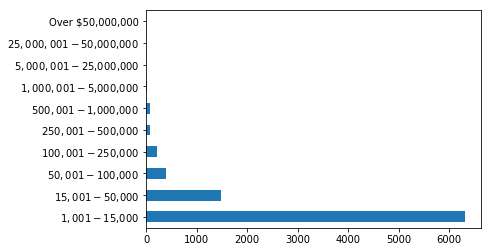

In [3]:
#Histogram of amounts
import matplotlib.pyplot as plt
sen_df['amount'].value_counts().plot(kind='barh')

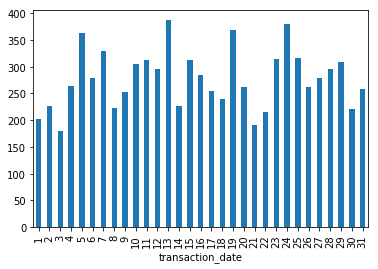

In [5]:
#histogram for days of the week traded
sen_df["transaction_date"].groupby(sen_df["transaction_date"].dt.day).count().plot(kind = "bar")


In [57]:
#plot frequency of trading dates over time
#count number of trades for each day, then set that date to the index 
trade_freq_df1 = sen_df["transaction_date"].value_counts().rename_axis('Date').reset_index(name='Count')
pd.to_datetime(sen_df['transaction_date'], format = '%Y-%m-%d')
trade_freq_df1.set_index('Date', inplace=True)

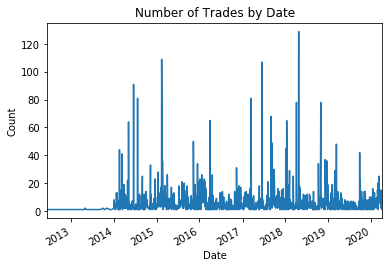

In [26]:
trade_freq_df1.Count.plot(title = "Number of Trades by Date")
plt.ylabel('Count')
plt.show()

In [59]:
max_date = str(sen_df['transaction_date'].max().date())
min_date = str(sen_df['transaction_date'].min().date())
trade_freq_df = trade_freq_df1.reindex(pd.date_range(min_date, max_date), fill_value="0")
trade_freq_df.index.name = "Date"
trade_freq_df['Count'] = trade_freq_df['Count'].astype(int)

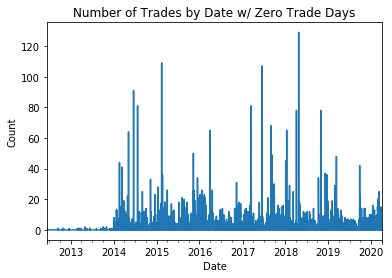

In [60]:
trade_freq_df.Count.plot(title = "Number of Trades by Date w/ Zero Trade Days")
plt.ylabel('Count')
plt.show()

In [86]:
from datetime import datetime, timedelta
def graph_range(center, freq_df = trade_freq_df, width = 10):
    glanceback = timedelta(days= width)
    low = center - glanceback
    high = center + glanceback
    range_df = freq_df[low:high]
    
    range_df.Count.plot(title = str(center.strftime("%B, %d, %Y")))
    plt.ylabel('Count')
    plt.show()
    
    
#trade_freq_df.head()    
glanceback = timedelta(days= 5)
trade_freq_df1 = trade_freq_df1.sort_values(by=['Count'], ascending=False)

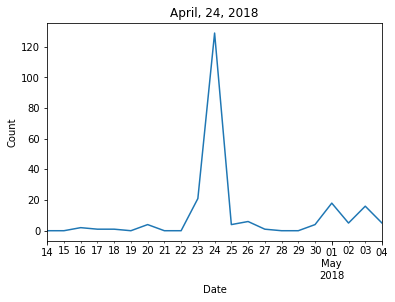

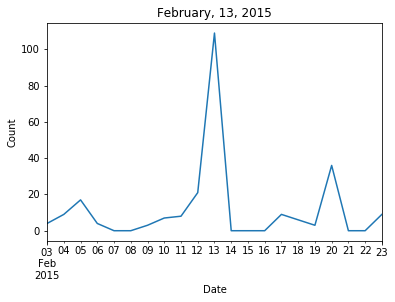

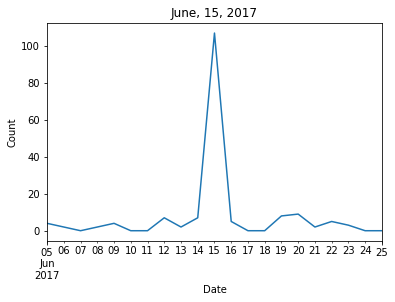

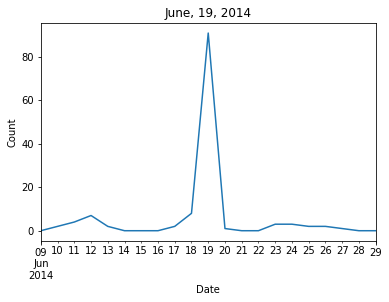

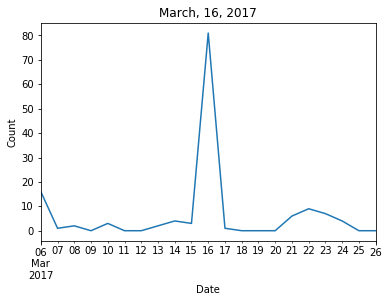

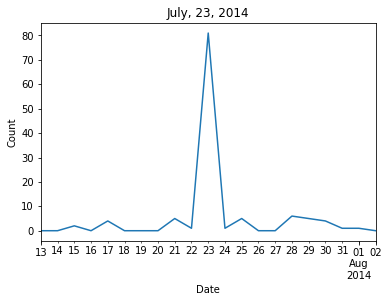

In [89]:
k = 0
for i in range(3):
    for j in range(2):
        date = trade_freq_df1.index.values[k]
        date_df = pd.to_datetime(str(date))
        graph_range(date_df)
        k = k + 1

Sources:
https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects